### Libraries

In [165]:
from sklearn import datasets
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Load Data

In [121]:
iris = datasets.load_iris()

In [122]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

### DataExplorations

In [124]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [125]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [126]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [127]:
iris_df.shape

(150, 4)

In [128]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [129]:
iris_df.duplicated().sum()

1

In [130]:
iris_df = iris_df.drop_duplicates()


In [131]:
iris_df.duplicated().sum()

0

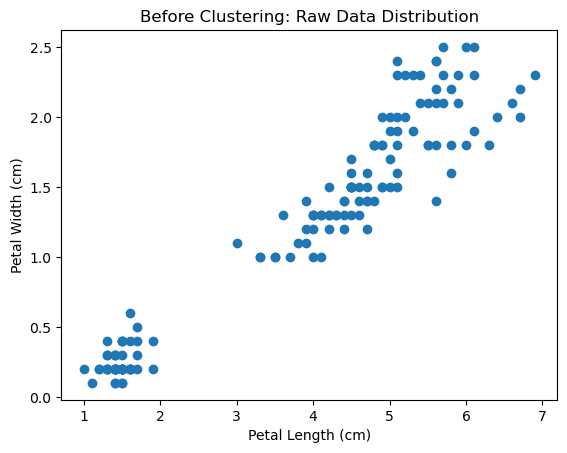

In [132]:
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Before Clustering: Raw Data Distribution')
plt.show()

### Feature Scaling

In [134]:

scaler = StandardScaler()
scaled_features = scaler.fit_transform(iris_df)

### Elbow Method

In [136]:
# Elbow method to find the optimal number of clusters
inertia_values = []
k_values = range(1, 11)  # Testing K from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)

C:\Users\jayak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jayak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jayak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jayak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [137]:
k_values

range(1, 11)

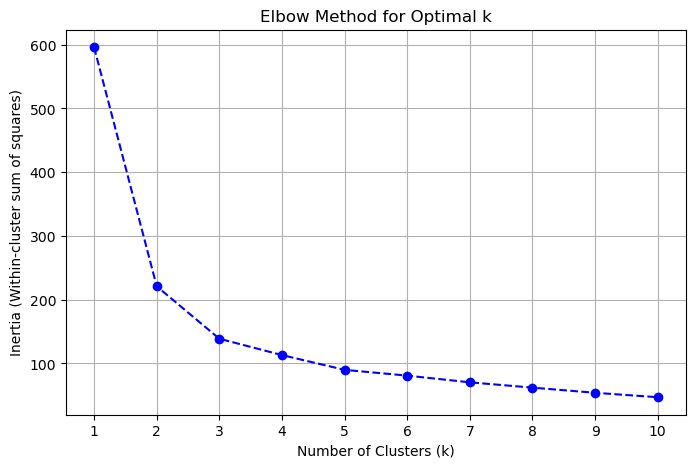

In [138]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### K-Means Clustering

In [140]:
kmeans = KMeans(n_clusters=3,init='k-means++', n_init=10,max_iter=300)

In [141]:
kmeans.fit_predict(scaled_features)

C:\Users\jayak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2])

In [142]:
iris_df["Cluster"]=kmeans.labels_

In [143]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

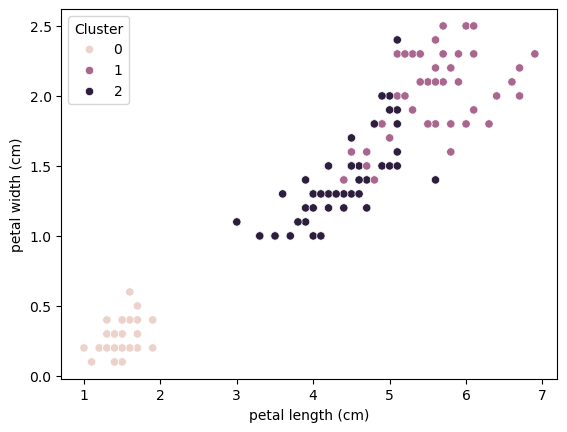

In [144]:
sns.scatterplot(data=iris_df,x="petal length (cm)",y="petal width (cm)",hue="Cluster")

In [145]:

labels = kmeans.labels_
silhouette_avg = silhouette_score(scaled_features, labels)

print(silhouette_avg)

0.46068122144785184


Moderate clustering . Need to improve

### Agglomerative Clustering

In [148]:
X=scaled_features.copy()


In [149]:
X

array([[-0.8980334 ,  1.01240113, -1.33325507, -1.30862368],
       [-1.13956224, -0.1373532 , -1.33325507, -1.30862368],
       [-1.38109108,  0.32254853, -1.39001364, -1.30862368],
       [-1.5018555 ,  0.09259766, -1.2764965 , -1.30862368],
       [-1.01879782,  1.242352  , -1.33325507, -1.30862368],
       [-0.53574014,  1.9322046 , -1.16297935, -1.04548613],
       [-1.5018555 ,  0.78245027, -1.33325507, -1.17705491],
       [-1.01879782,  0.78245027, -1.2764965 , -1.30862368],
       [-1.74338434, -0.36730407, -1.33325507, -1.30862368],
       [-1.13956224,  0.09259766, -1.2764965 , -1.44019246],
       [-0.53574014,  1.47230287, -1.2764965 , -1.30862368],
       [-1.26032666,  0.78245027, -1.21973792, -1.30862368],
       [-1.26032666, -0.1373532 , -1.33325507, -1.44019246],
       [-1.86414876, -0.1373532 , -1.50353079, -1.44019246],
       [-0.05268246,  2.16215547, -1.44677222, -1.30862368],
       [-0.17344688,  3.08195894, -1.2764965 , -1.04548613],
       [-0.53574014,  1.

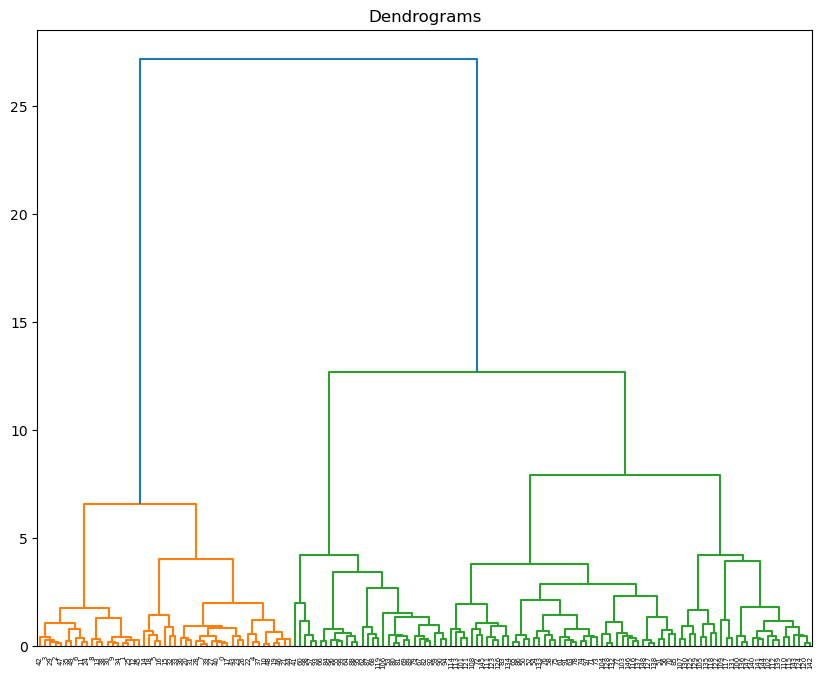

In [150]:
# Plotting a Dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage (X, method='ward'))

In [151]:
clusters = AgglomerativeClustering()
clusters.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [155]:
cluster_labels = clusters.fit_predict(X)


In [161]:
# Evaluate the clustering performance
# 1. Silhouette Score
sil_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.58


In [163]:
db_score = davies_bouldin_score(X, cluster_labels)
print(f"Davies-Bouldin Score: {db_score:.2f}")

Davies-Bouldin Score: 0.59


### Dimensionality Reduction

In [168]:
Y = scaled_features.copy()
Y

array([[-0.8980334 ,  1.01240113, -1.33325507, -1.30862368],
       [-1.13956224, -0.1373532 , -1.33325507, -1.30862368],
       [-1.38109108,  0.32254853, -1.39001364, -1.30862368],
       [-1.5018555 ,  0.09259766, -1.2764965 , -1.30862368],
       [-1.01879782,  1.242352  , -1.33325507, -1.30862368],
       [-0.53574014,  1.9322046 , -1.16297935, -1.04548613],
       [-1.5018555 ,  0.78245027, -1.33325507, -1.17705491],
       [-1.01879782,  0.78245027, -1.2764965 , -1.30862368],
       [-1.74338434, -0.36730407, -1.33325507, -1.30862368],
       [-1.13956224,  0.09259766, -1.2764965 , -1.44019246],
       [-0.53574014,  1.47230287, -1.2764965 , -1.30862368],
       [-1.26032666,  0.78245027, -1.21973792, -1.30862368],
       [-1.26032666, -0.1373532 , -1.33325507, -1.44019246],
       [-1.86414876, -0.1373532 , -1.50353079, -1.44019246],
       [-0.05268246,  2.16215547, -1.44677222, -1.30862368],
       [-0.17344688,  3.08195894, -1.2764965 , -1.04548613],
       [-0.53574014,  1.

In [174]:
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(Y)

In [176]:
print(f"Number of components chosen by PCA to retain 95% variance: {pca.n_components_}")

Number of components chosen by PCA to retain 95% variance: 2


In [180]:
print(f"Original Dimensions: {Y.shape[1]}")
print(f"Reduced Dimensions: {Y_pca.shape[1]}")

Original Dimensions: 4
Reduced Dimensions: 2


### Explain why Hierarchical clustering might be suitable for the Iris dataset.


* Hierarchical clustering can be a great choice for the Iris dataset due to its small size and natural group structure.

### Explain why KMeans clustering might be suitable for the Iris dataset.


* The Iris Dataset Has Well-Separated Clusters
* Efficient and Scalable
* Works Well with High-Dimensional Data